In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scFunctions as sf
import scFates as scf
import palantir
import pickle

# Inital setting for plot size
from matplotlib import rcParams
FIGSIZE=(5,5)
rcParams['figure.figsize']=FIGSIZE

import warnings
warnings.filterwarnings('ignore')

sc.settings.verbosity = 3


%config Completer.use_jedi = False

# VN9

In [2]:
#Load saved adata object
with open('../data/adata_epi.pickle', 'rb') as f1:
     adata_epi = pickle.load(f1)

In [3]:
df = pd.read_table("../data/clusters.tsv", index_col=0)
df.shape

(3137, 6)

In [4]:
df

,status,assignment,log_prob_singleton,log_prob_doublet,cluster0,cluster1
barcode,,,,,,
AAACCCAAGACGGTCA-1,doublet,0/1,-72.182372,-67.771633,-72.182372,-111.213483
AAACCCAGTAACGCGA-1,singlet,0,-154.783727,-155.372174,-154.783727,-274.835306
AAACCCAGTTTCTATC-1,unassigned,0/1,-1.724943,-1.527100,-1.724943,-3.580945
AAACGAAAGCCTAGGA-1,doublet,0/1,-318.797287,-298.632782,-318.797287,-380.547632
AAACGCTTCACACCGG-1,doublet,0/1,-155.428610,-140.046116,-155.428610,-168.561012
...,...,...,...,...,...,...
TTTCCTCAGACTTGTC-1,singlet,1,-162.027415,-163.335282,-180.718958,-162.027415
TTTGACTAGCCTATTG-1,singlet,1,-48.895370,-61.315633,-101.906608,-48.895370
TTTGGAGAGTGAGCCA-1,singlet,1,-8.160564,-10.214921,-12.476366,-8.160564


In [5]:
df.assignment.value_counts()

0      1585
1      1025
0/1     363
1/0     164
Name: assignment, dtype: int64

In [6]:
cells_id = adata_epi.obs[adata_epi.obs["orig.ident"] == "AV75"].index



In [7]:
liste = []
n_err = 0
for id in adata_epi.obs.index:
    if id in cells_id:
        if id[:18] in df.index:
            liste.append(df.loc[id[:18], "assignment"])
        else:
            liste.append("barcode_not_in_barcodes.tsv")
            n_err += 1
    else:
        liste.append("NA")

In [9]:
n_err

1683

In [10]:
print(len(liste))
print(len(df.index))

9743
3137


In [11]:
adata_epi.obs["assignation"] = liste
adata_epi.obs[adata_epi.obs["orig.ident"] == "AV75"]

,orig.ident,nCount_RNA,nFeature_RNA,Experiment_ID,Stage,New_Cell_ID,Population,Mouse_ID,Week_post Cre_activation,Sub_class_Stage,Mammary_glands,mouse_age_(Week),Stage_old,assignation
AACGGGAGTTCTTAGG-1_1_15,AV75,2330.0,1404,AV75,Tumor,AACGGGAGTTCTTAGG-1_1_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
AAGGAATGTCCGAAGA-1_1_15,AV75,100592.0,8110,AV75,Tumor,AAGGAATGTCCGAAGA-1_1_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
ACAAGCTAGTTTGAGA-1_1_15,AV75,37714.0,6009,AV75,Tumor,ACAAGCTAGTTTGAGA-1_1_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
ACATGCACACTGAATC-1_1_15,AV75,71026.0,7536,AV75,Tumor,ACATGCACACTGAATC-1_1_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
ACCCAAACAAGTCCCG-1_1_15,AV75,4839.0,1710,AV75,Tumor,ACCCAAACAAGTCCCG-1_1_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCAACTGGT-1_2_15,AV75,6730.0,1981,AV75,Tumor,TTTGGAGTCAACTGGT-1_2_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,barcode_not_in_barcodes.tsv
TTTGGAGTCAGTCAGT-1_2_15,AV75,42403.0,7055,AV75,Tumor,TTTGGAGTCAGTCAGT-1_2_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,0/1
TTTGGTTTCACTACGA-1_2_15,AV75,10010.0,1740,AV75,Tumor,TTTGGTTTCACTACGA-1_2_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,1
TTTGTTGAGGCCTGCT-1_2_15,AV75,97805.0,8480,AV75,Tumor,TTTGTTGAGGCCTGCT-1_2_AV75_10X,Tumor_cells,985bf1_986af2,31.0,Tumor,GM5D,46_52,Tumor,0


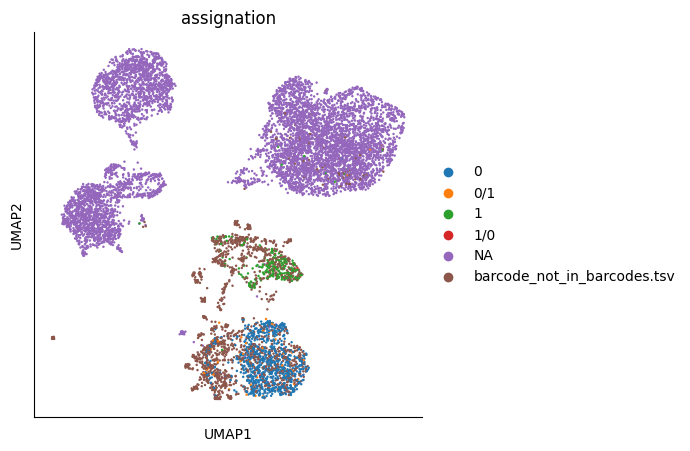

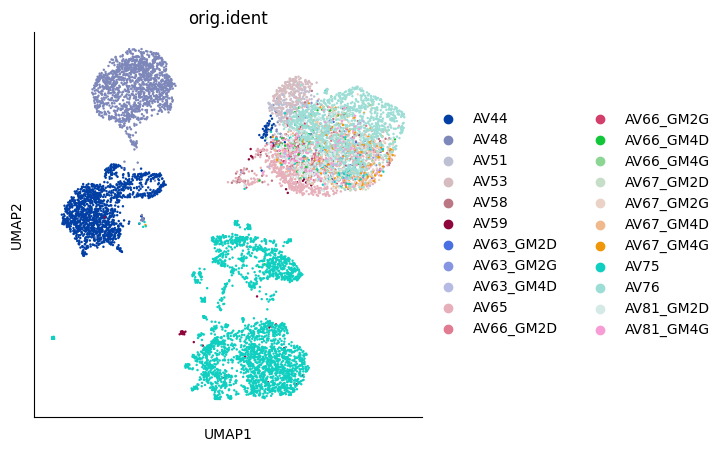

In [12]:
sc.pl.umap(adata_epi, color = "assignation")
sc.pl.umap(adata_epi, color = "orig.ident")

In [13]:
sc.tl.tsne(adata_epi)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:08)


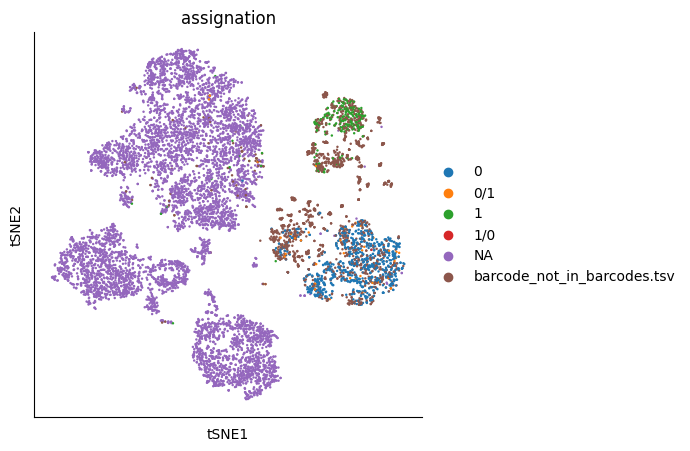

In [14]:
sc.pl.tsne(adata_epi, color = "assignation")

In [15]:
sc.tl.louvain(adata_epi, resolution = 0.3)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


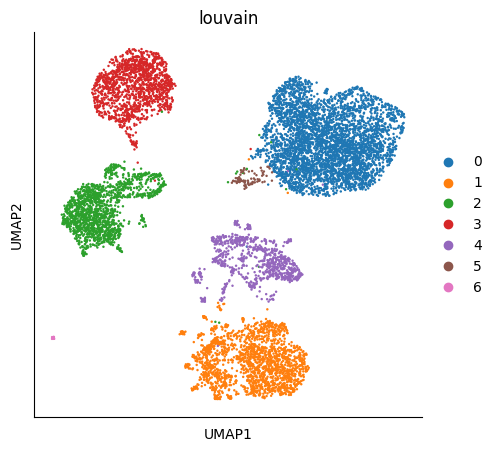

In [16]:
sc.pl.umap(adata_epi, color = 'louvain')

In [17]:
adata = sc.read_h5ad("../data/MERGED_SEU_REANOTATE_V3.h5ad")
adata

AnnData object with n_obs × n_vars = 120860 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [18]:
cells_to_remove = "AV63_GM4G"

adata = adata[adata.obs['orig.ident'] != cells_to_remove, :].copy()
adata

AnnData object with n_obs × n_vars = 119630 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [19]:
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"] = "Early_Stages"
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"]


45p_GM4D_AAACCCACAGTTGGTT-1    Early_Stages
45p_GM4D_AAACCCATCGTTATCT-1    Early_Stages
45p_GM4D_AAACGAAAGGTTGTTC-1    Early_Stages
45p_GM4D_AAAGAACGTTGCTAGT-1    Early_Stages
45p_GM4D_AAAGGATAGTCGAAGC-1    Early_Stages
                                   ...     
45n_4D_TTTGACTCACATGTTG-1      Early_Stages
45n_4D_TTTGACTGTAGGAGTC-1      Early_Stages
45n_4D_TTTGACTTCACGTAGT-1      Early_Stages
45n_4D_TTTGATCTCGCGTGAC-1      Early_Stages
45n_4D_TTTGTTGAGAGTGGCT-1      Early_Stages
Name: Stage, Length: 1531, dtype: object

In [20]:
adata_75 = adata[adata.obs['orig.ident'] == "AV75", :].copy()
adata_75

AnnData object with n_obs × n_vars = 10683 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


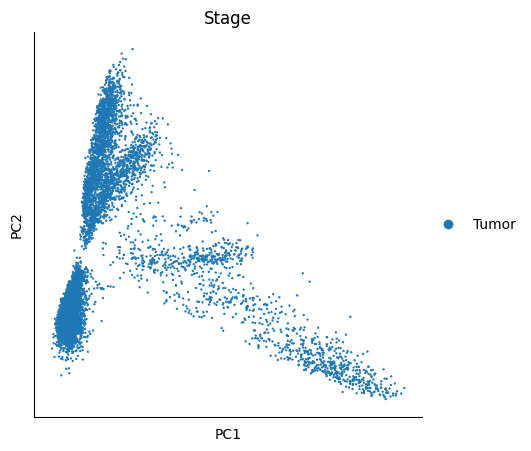

In [21]:
adata_75 = sf.pp_PCA(adata_75) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

sc.pl.pca(adata_75, color = "Stage")

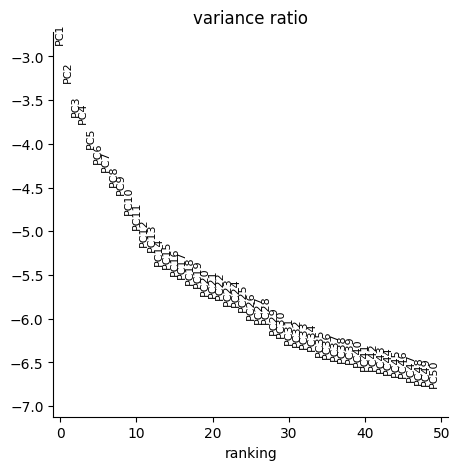

In [22]:
sc.pl.pca_variance_ratio(adata_75, log=True, n_pcs = 50) #ndim = 30

In [23]:
sc.pp.neighbors(adata_75, n_pcs=30)
sc.tl.umap(adata_75)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


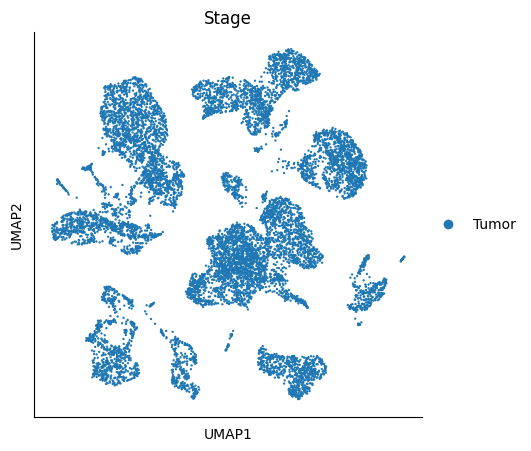

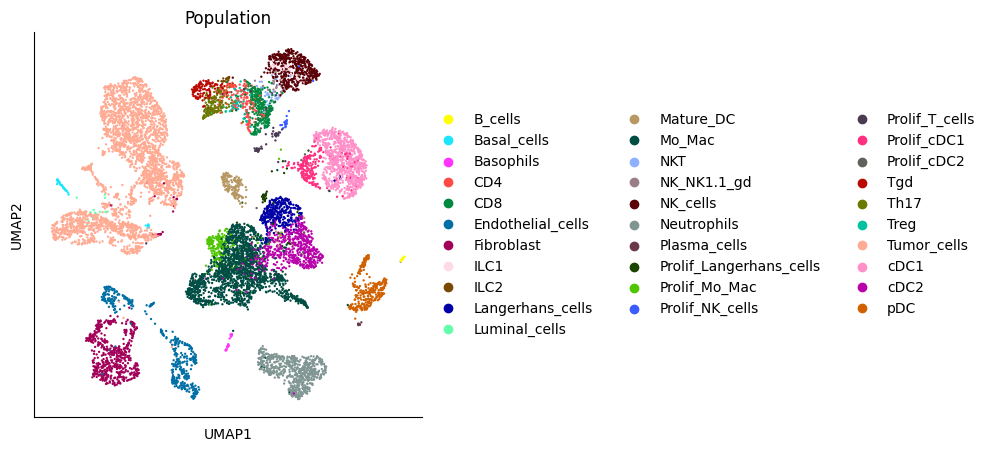

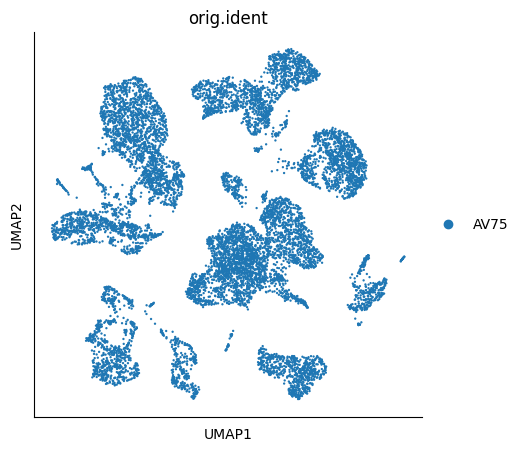

In [24]:
sc.pl.umap(adata_75, color = 'Stage')
sc.pl.umap(adata_75, color = 'Population')
sc.pl.umap(adata_75, color = 'orig.ident')

In [25]:
liste = []
j = 0
for cell in adata_75.obs.index:
    if cell[0:18] in df.index:
        liste.append(df.loc[cell[0:18], "assignment"])
    else:
        liste.append("NA")

In [26]:
adata_75.obs["assignation"] = liste

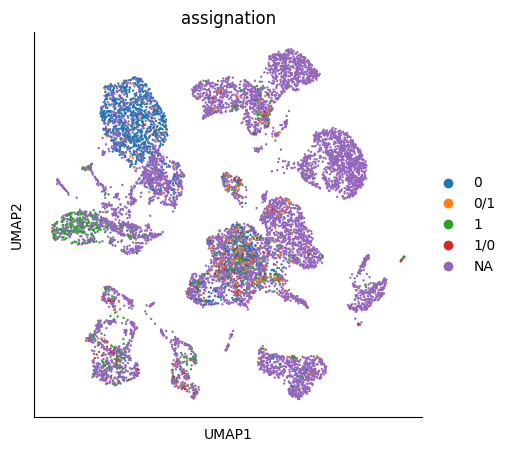

In [27]:
sc.pl.umap(adata_75, color = "assignation")

In [28]:
sc.tl.louvain(adata_75, resolution = 0.25)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


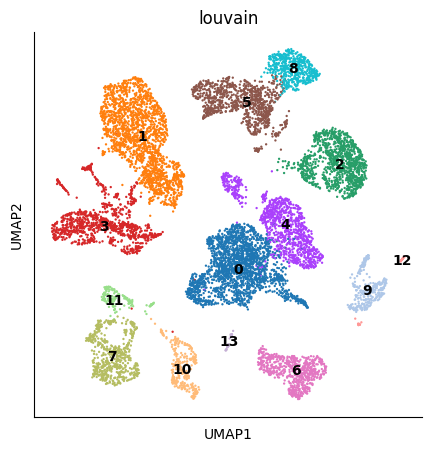

In [29]:
sc.pl.umap(adata_75, color = 'louvain', legend_loc = "on data")

In [31]:
test = adata_75.obs.groupby(['Population','louvain']).size().reset_index()

In [32]:
test[test["Population"] == "Tumor_cells"]

,Population,louvain,0
378,Tumor_cells,0,0
379,Tumor_cells,1,1837
380,Tumor_cells,2,0
381,Tumor_cells,3,971
382,Tumor_cells,4,0
383,Tumor_cells,5,0
384,Tumor_cells,6,0
385,Tumor_cells,7,3
386,Tumor_cells,8,0
387,Tumor_cells,9,0


In [33]:
adata_75_tum = adata_75[adata_75.obs['Population'] == "Tumor_cells", :].raw.to_adata().copy()
adata_75_tum

AnnData object with n_obs × n_vars = 2815 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'assignation', 'louvain'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'Population_colors', 'orig.ident_colors', 'assignation_colors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [43]:
adata_75_tum = sf.pp_PCA(adata_75_tum) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

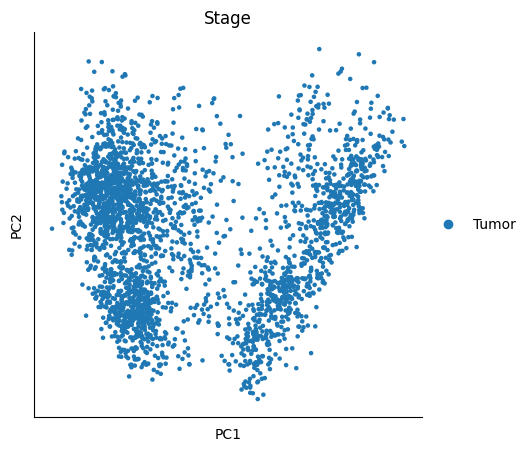

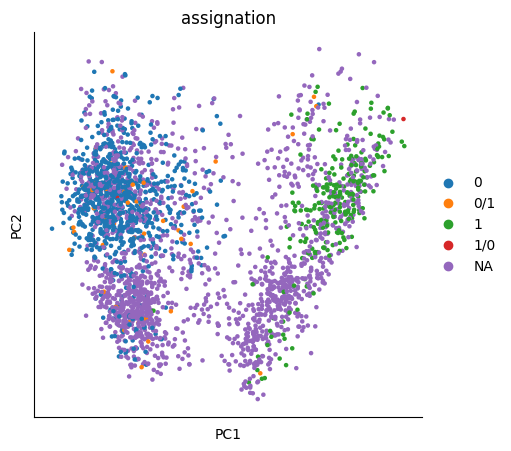

In [45]:
sc.pl.pca(adata_75_tum, color = "Stage")
sc.pl.pca(adata_75_tum, color = "assignation")

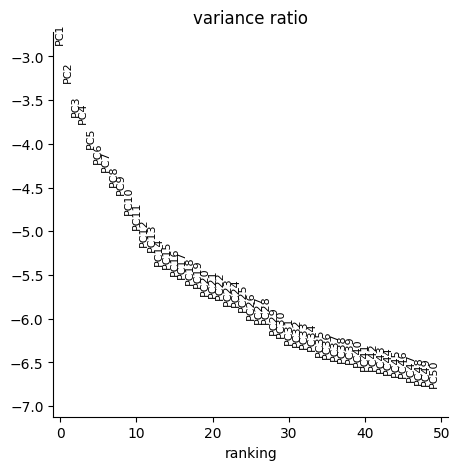

In [35]:
sc.pl.pca_variance_ratio(adata_75, log=True, n_pcs = 50) #ndim = 30

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


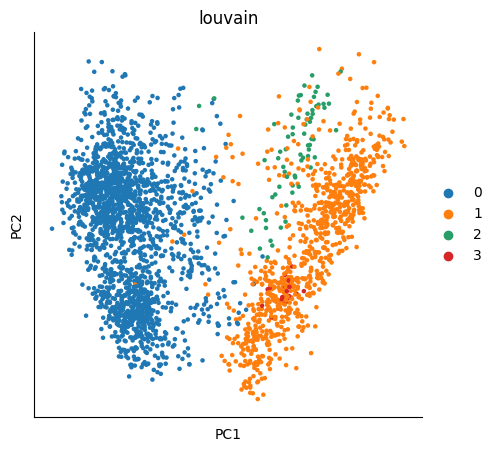

In [50]:
sc.pp.neighbors(adata_75_tum, n_pcs=30, use_rep="X_pca")
sc.tl.louvain(adata_75_tum, resolution = 0.05)
sc.pl.pca(adata_75_tum, color = "louvain")

In [51]:
# Clusters 0 -> AV_75_1
# Clusters 1, 2, 3 -> AV_75_2

In [52]:
AV75_1 = [cell for cell in adata_75_tum.obs.index if adata_75_tum.obs.loc[cell, "louvain"] in ["0"]]
AV75_2 = [cell for cell in adata_75_tum.obs.index if adata_75_tum.obs.loc[cell, "louvain"] in ["1", "2", "3"]]

In [53]:
new_orig = []
for i in adata.obs.index:
    if i in AV75_1:
        new_orig.append("AV75_tumor1")
    
    elif i in AV75_2:
        new_orig.append("AV75_tumor2")
    
    else:
        new_orig.append(adata.obs.loc[i, "orig.ident"])

In [56]:
#Load saved adata object
with open('../data/adata.pickle', 'rb') as f1:
     adata = pickle.load(f1)

In [57]:
adata.obs["new_orig"] = new_orig

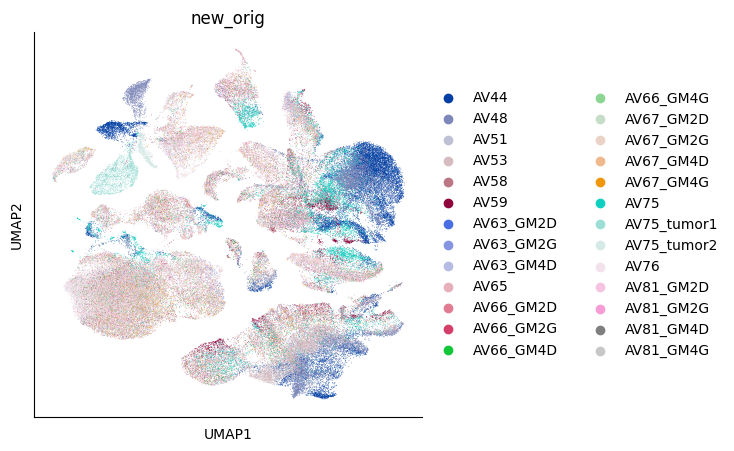

In [58]:
sc.pl.umap(adata, color = 'new_orig')

In [60]:
# Save adata 
# with open('../data/adata_new_orig.pickle', 'wb') as f1:
#   pickle.dump(adata, f1)

In [61]:
#Load saved adata object
with open('../data/adata_epi.pickle', 'rb') as f1:
     adata_epi = pickle.load(f1)

In [62]:
adata_epi

AnnData object with n_obs × n_vars = 9743 × 2569
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'Stage_old'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'orig.ident_colors', 'Population_colors', 'draw_graph', 'diffmap_evals', 'Experiment_ID_colors', 'Stage_old_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [69]:
temp = []
for i in adata.obs.index:
    if i in adata_epi.obs.index:
        temp.append(adata.obs.loc[i, "new_orig"])

In [71]:
adata_epi.obs["new_orig"] = temp

In [75]:
# Save adata 
# with open('../data/adata_epi_new_orig.pickle', 'wb') as f1:
#   pickle.dump(adata_epi, f1)

In [76]:
adata.obs.to_csv("../data/adata_new_orig_metadata.csv")

# VP9

In [3]:
#Load saved adata object
with open('../data/adata_new_orig.pickle', 'rb') as f1:
     adata = pickle.load(f1)

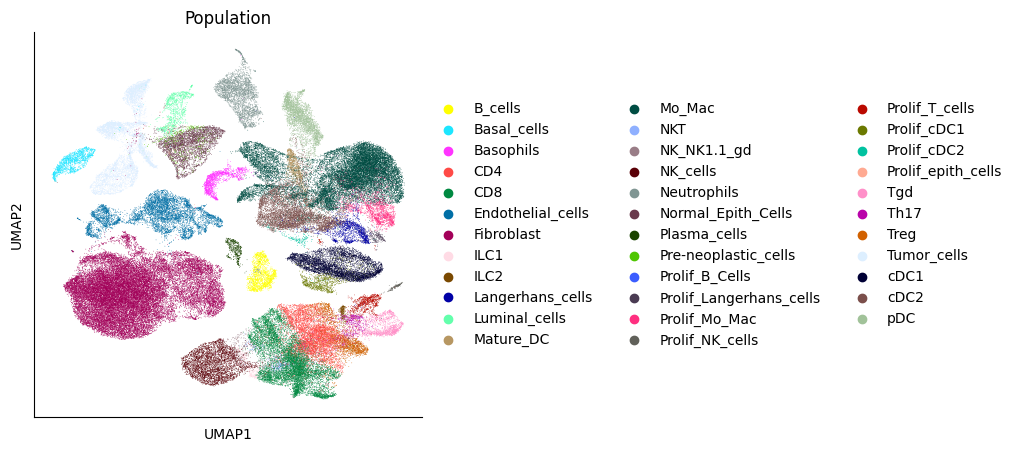

In [7]:
sc.pl.umap(adata, color = "Population")

In [11]:
list_epi = ["Basal_cells", "Endothelial_cells", 
            "Fibroblast", "Luminal_cells", 
            "Normal_Epith_Cells", "Pre-neoplastic_cells", 
            "Prolif_epith_cells", "Tumor_cells"]

adata_immu = adata[~adata.obs['Population'].isin(list_epi), :].raw.to_adata().copy()
adata_immu


AnnData object with n_obs × n_vars = 70177 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'new_orig'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'new_orig_colors', 'Population_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [14]:
adata_immu = sf.pp_PCA(adata_immu) # Function defined in scFunction.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


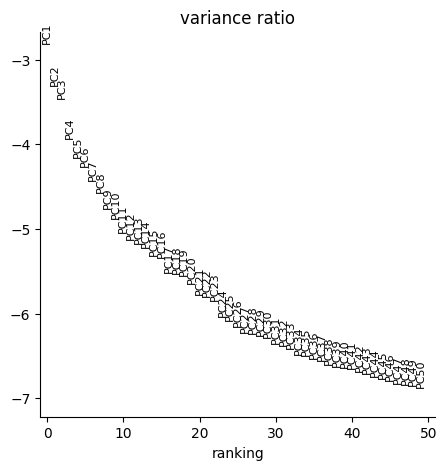

In [15]:
sc.pl.pca_variance_ratio(adata_immu, log=True, n_pcs = 50) #ndim = 30

In [16]:
sc.pp.neighbors(adata_immu, n_pcs=30)
sc.tl.umap(adata_immu)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:46)


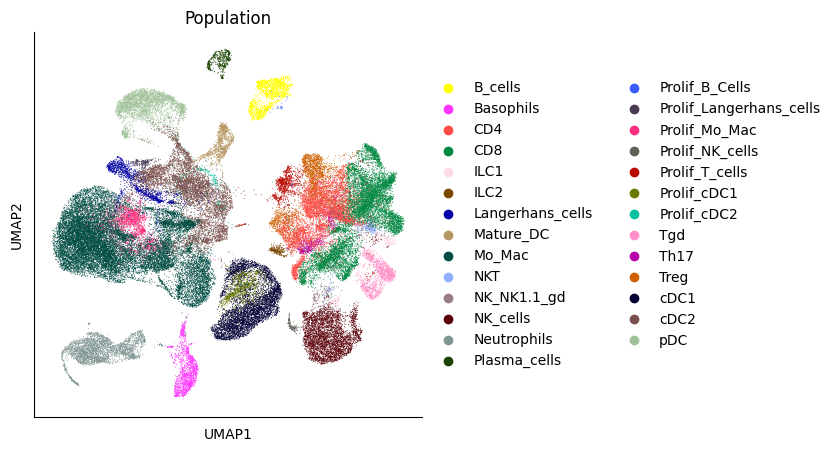

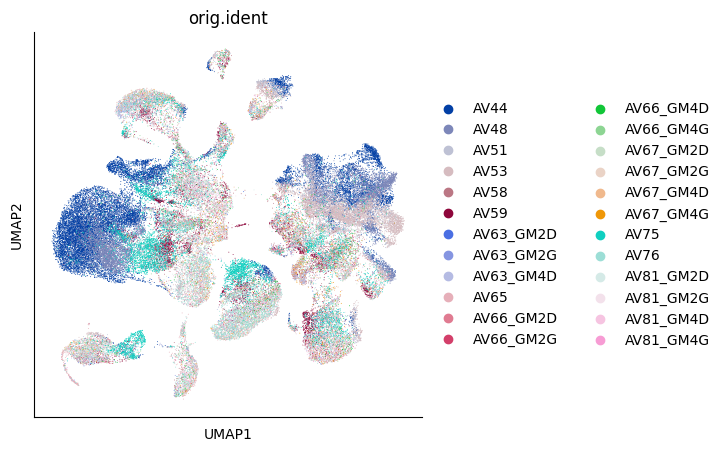

In [18]:
sc.pl.umap(adata_immu, color = "Population")
sc.pl.umap(adata_immu, color = "orig.ident")

In [19]:
df = pd.read_table("../data/clusters_Vp9.tsv", index_col=0)
df.shape

(8004, 6)

In [20]:
df.assignment.value_counts()

0      4483
1      1766
0/1    1353
1/0     402
Name: assignment, dtype: int64

In [21]:
cells_id = adata_immu.obs[adata_immu.obs["orig.ident"] == "AV75"].index

In [22]:
liste = []
n_err = 0
for id in adata_immu.obs.index:
    if id in cells_id:
        if id[:18] in df.index:
            liste.append(df.loc[id[:18], "assignment"])
        else:
            liste.append("barcode_not_in_barcodes.tsv")
            n_err += 1
    else:
        liste.append("NA")

In [23]:
n_err

1106

In [24]:
print(len(liste))
print(len(df.index))

70177
8004


In [25]:
adata_immu.obs["assignation"] = liste

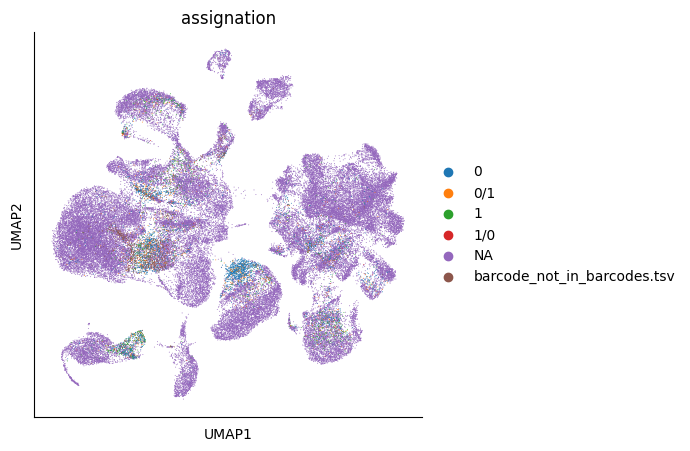

In [26]:
sc.pl.umap(adata_immu, color = "assignation")

In [27]:
adata_immu_75 = adata_immu[adata_immu.obs['orig.ident'] == "AV75", :].raw.to_adata().copy()

adata_immu_75

AnnData object with n_obs × n_vars = 6718 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'new_orig', 'assignation'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'new_orig_colors', 'Population_colors', 'orig.ident_colors', 'assignation_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


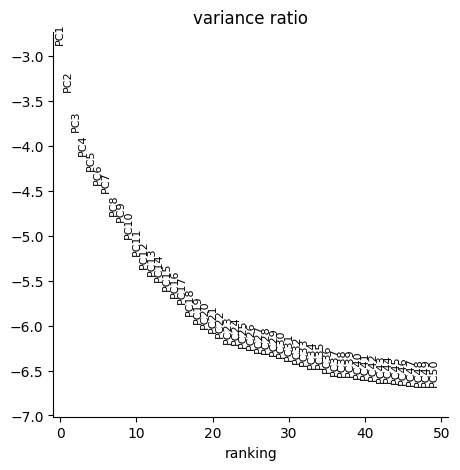

In [28]:
adata_immu_75 = sf.pp_PCA(adata_immu_75) # Function defined in scFunction.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

sc.pl.pca_variance_ratio(adata_immu_75, log=True, n_pcs = 50) #ndim = 30

In [29]:
sc.pp.neighbors(adata_immu_75, n_pcs=30)
sc.tl.umap(adata_immu_75)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


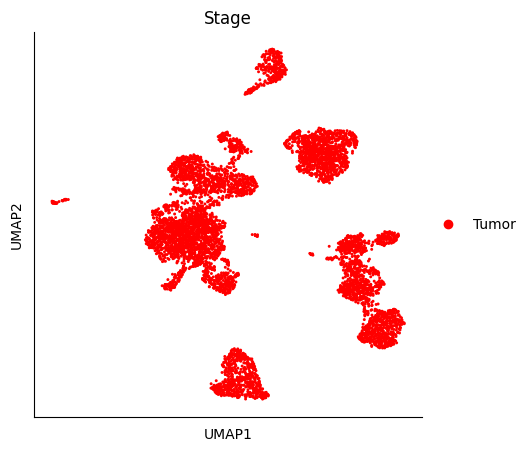

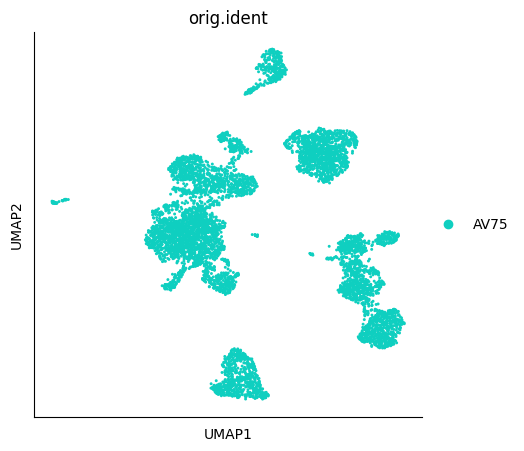

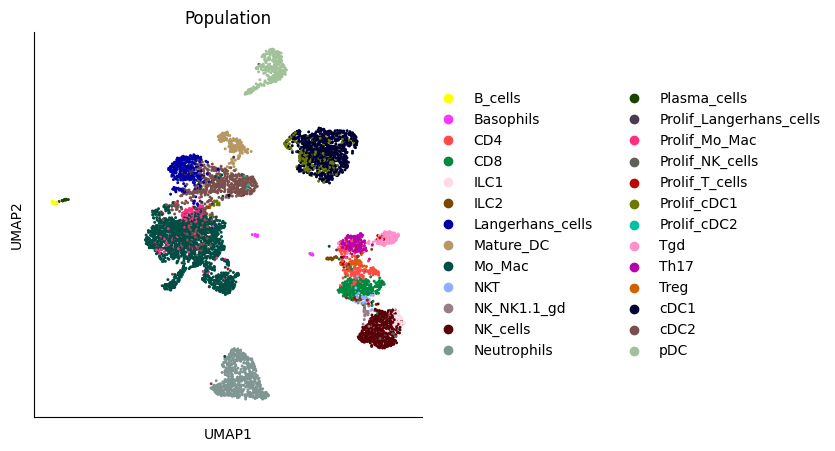

In [32]:
sc.pl.umap(adata_immu_75, color = 'Stage')
sc.pl.umap(adata_immu_75, color = 'orig.ident')
sc.pl.umap(adata_immu_75, color = 'Population')

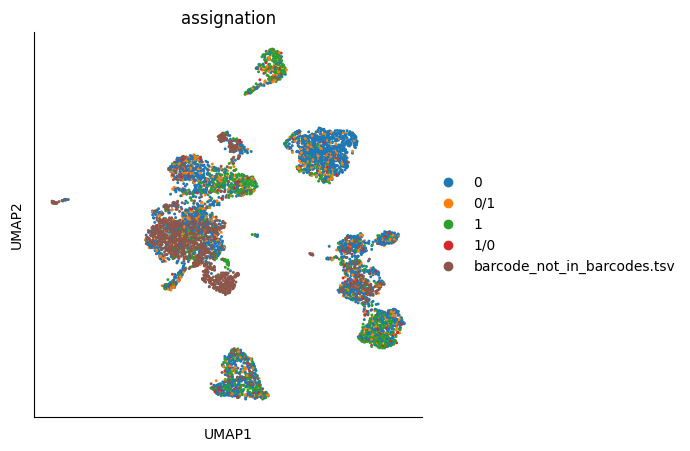

In [33]:
sc.pl.umap(adata_immu_75, color = 'assignation')

Pas aussi clair mais au moins on a les résultatsq